In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as apu
from pycraf import atm
from pycraf import conversions as cnv

total path length 1:   5.0000 km
total path length 2:   5.0000 km
refraction: -0.01107 d / 0.09894 d


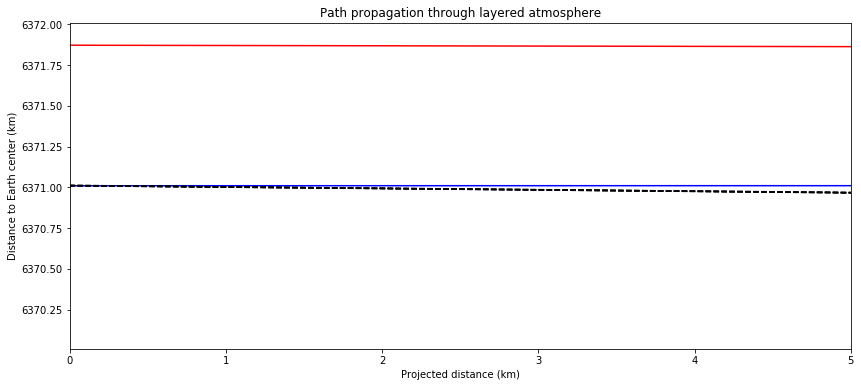

In [3]:
elevation = 0.01  # deg
obs_alt = 10.  # m
path_params_1, refraction_1 = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )
elevation = -0.1  # degrees
obs_alt = 872.  # meters
path_params_2, refraction_2 = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )

print('total path length 1: {:8.4f} km'.format(sum(t[3] for t in path_params_1)))
print('total path length 2: {:8.4f} km'.format(sum(t[3] for t in path_params_2)))
print('refraction: {:7.5f} d / {:7.5f} d'.format(refraction_1, refraction_2))


radii_1 = np.array([t[4] for t in path_params_1])
angles_1 = np.array([t[6] for t in path_params_1])
heights_1 = np.array([t[8] for t in path_params_1])
radii_2 = np.array([t[4] for t in path_params_2])
angles_2 = np.array([t[6] for t in path_params_2])
layer_angles = np.linspace(0, np.pi / 2, 91)

x1, y1 = radii_1 * np.sin(angles_1), radii_1 * np.cos(angles_1)
x2, y2 = radii_2 * np.sin(angles_2), radii_2 * np.cos(angles_2)

plt.close()
fig = plt.figure(figsize=(14, 6))
plt.plot(x1, y1, 'b-')
plt.plot(x2, y2, 'r-')
for r in np.linspace(radii_1[0], radii_1[-1], 10):
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles), 'k--', alpha=0.5)

plt.xlim((x1[0], x1[-1]))
plt.ylim((y1[0]-1, y1[-1]+1))
# plt.ylim((y1[0], y2[0]+1e-3))
# plt.xlim((x1[0], 1.2))
# plt.ylim((y2[0]-0.23, y2[0]+0.01))
# plt.xlim((x1[0], 0.01))
# plt.ylim((y1[0]-0.0001, y1[0]+0.001))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Distance to Earth center (km)')
# plt.gca().set_aspect('equal')
plt.show()




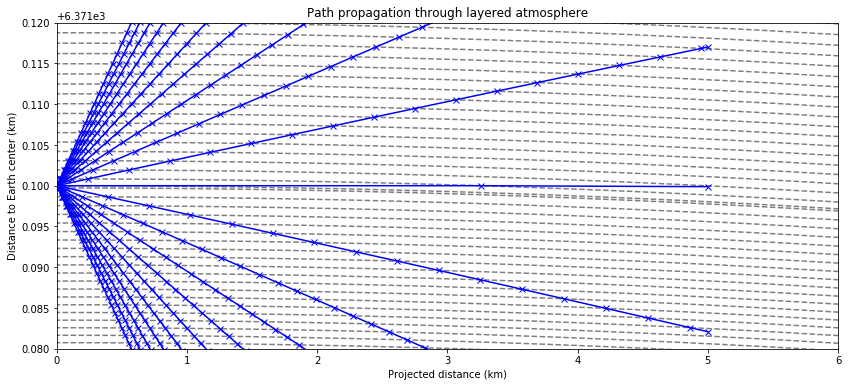

In [4]:
obs_alt = 100.
earth_radius = 6371.
layer_angles = np.linspace(-0.001, 0.02, 361)

deltas = 0.0001 * np.exp(np.arange(900) / 100.)
heights = np.cumsum(np.hstack([0., deltas]))
if obs_alt > 1.e-3:
    obs_idx = np.searchsorted(heights, obs_alt / 1000.)
    heights = np.hstack([
        heights[:obs_idx],
        obs_alt / 1000.,
        heights[obs_idx:]
        ])

plt.close()
fig = plt.figure(figsize=(14, 6))
for r in earth_radius + heights:
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles), 'k--', alpha=0.5)

for elevation in np.linspace(-2, 2, 21):
    path_params, _ = atm.atm._prepare_path(
        elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
        )
    radii = np.array([t[4] for t in path_params])
    angles = np.array([t[6] for t in path_params])
    x, y = radii * np.sin(angles), radii * np.cos(angles)

    plt.plot(x, y, 'bx-')


plt.xlim((0, 6))
plt.ylim((earth_radius + (obs_alt - 20) / 1000, earth_radius + (obs_alt + 20) / 1000))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Distance to Earth center (km)')
# plt.gca().set_aspect('equal')
plt.show()
